# 5. Image Enhancement - Histogram Equalization

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def display_image(img, title=""):
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

**a)** Take a low contrast grayscale image and plot its histogram.

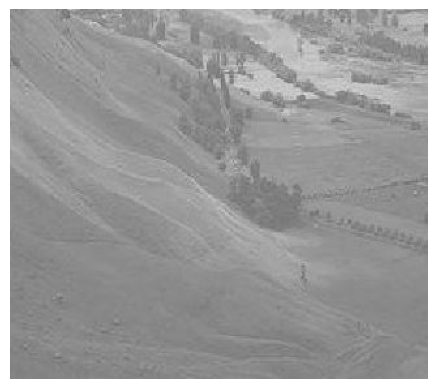

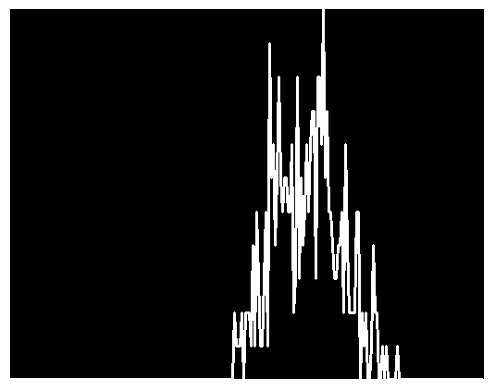

In [2]:
IMAGE_PATH = "../../images/lowContrast_01.jpg"

image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

display_image(image)

HIST_SIZE = 256
HIST_RANGE = (0, 256)
ACCUMULATE = False

hist = cv2.calcHist(image, [0], None, [HIST_SIZE], HIST_RANGE, accumulate=ACCUMULATE)

# From https://docs.opencv.org/4.x/d8/dbc/tutorial_histogram_calculation.html
HIST_W = 512
HIST_H = 400
BIN_W = int(round(HIST_W / HIST_SIZE))
hist_image = np.zeros((HIST_H, HIST_W, 3), dtype=np.uint8)

cv2.normalize(hist, hist, alpha=0, beta=HIST_H, norm_type=cv2.NORM_MINMAX)

for i in range(1, HIST_SIZE):
    cv2.line(
        hist_image,
        (BIN_W * (i - 1), HIST_H - int(hist[i - 1])),
        (BIN_W * (i), HIST_H - int(hist[i])),
        (255, 255, 255),
        thickness=2,
    )

display_image(hist_image)

**b)** Enhance the image constrast using:
 - **b1)** simple histogram equalization, or

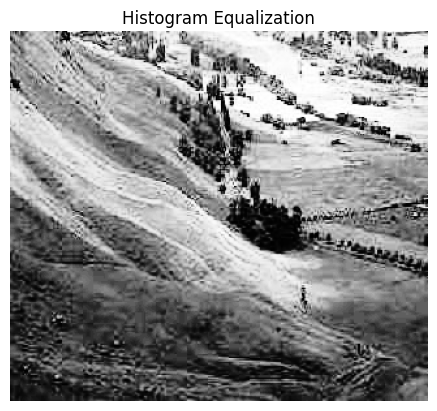

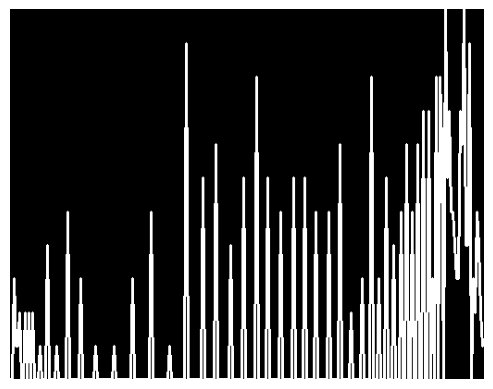

In [3]:
equ = cv2.equalizeHist(image)

hist_equ = cv2.calcHist(equ, [0], None, [HIST_SIZE], HIST_RANGE, accumulate=ACCUMULATE)
hist_equ_image = np.zeros((HIST_H, HIST_W, 3), dtype=np.uint8)

cv2.normalize(hist_equ, hist_equ, alpha=0, beta=HIST_H, norm_type=cv2.NORM_MINMAX)

for i in range(1, HIST_SIZE):
    cv2.line(
        hist_equ_image,
        (BIN_W * (i - 1), HIST_H - int(hist_equ[i - 1])),
        (BIN_W * (i), HIST_H - int(hist_equ[i])),
        (255, 255, 255),
        thickness=2,
    )

plt.imshow(equ, cmap="gray")
plt.title("Histogram Equalization")
plt.axis("off")

display_image(hist_equ_image)

- **b2)** CLAHE

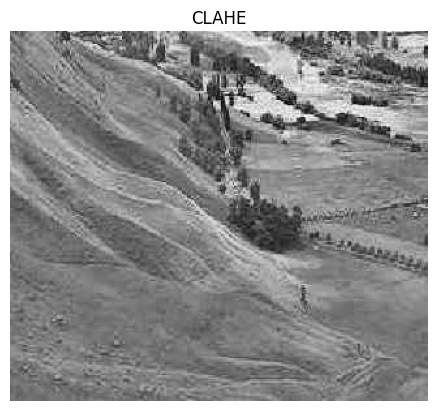

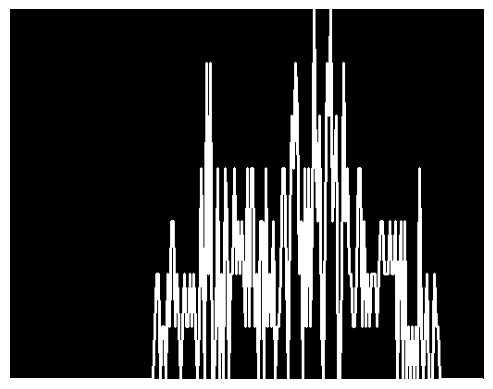

In [4]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(image)

plt.imshow(cl1, cmap="gray")
plt.title("CLAHE")
plt.axis("off")
plt.show()

hist_cl1 = cv2.calcHist(cl1, [0], None, [HIST_SIZE], HIST_RANGE, accumulate=ACCUMULATE)
hist_cl1_image = np.zeros((HIST_H, HIST_W, 3), dtype=np.uint8)

cv2.normalize(hist_cl1, hist_cl1, alpha=0, beta=HIST_H, norm_type=cv2.NORM_MINMAX)

for i in range(1, HIST_SIZE):
    cv2.line(
        hist_cl1_image,
        (BIN_W * (i - 1), HIST_H - int(hist_cl1[i - 1])),
        (BIN_W * (i), HIST_H - int(hist_cl1[i])),
        (255, 255, 255),
        thickness=2,
    )

display_image(hist_cl1_image)

**c)** Repeat the previous operations on a color image

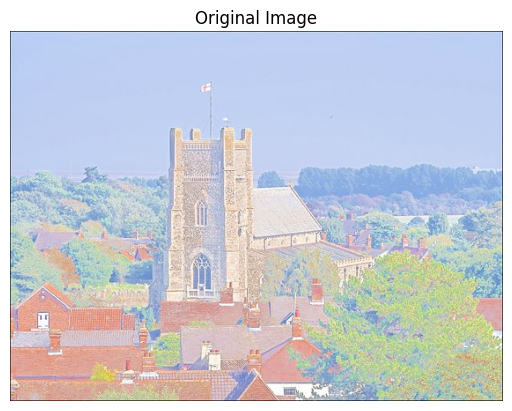

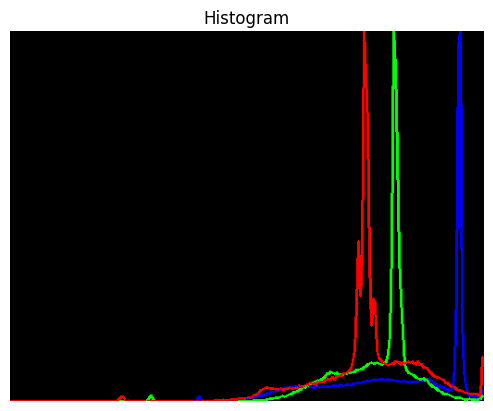

In [11]:
IMAGE_PATH_COLOR = "../../images/lowContrast_05.jpg"

image_color = cv2.imread(IMAGE_PATH_COLOR)
bgr_planes = cv2.split(image_color)
display_image(image_color, "Original Image")


def histogram_color(planes):
    hist_image_color = np.zeros((HIST_H, HIST_W, 3), dtype=np.uint8)

    b_hist = cv2.calcHist(
        planes, [0], None, [HIST_SIZE], HIST_RANGE, accumulate=ACCUMULATE
    )
    g_hist = cv2.calcHist(
        planes, [1], None, [HIST_SIZE], HIST_RANGE, accumulate=ACCUMULATE
    )
    r_hist = cv2.calcHist(
        planes, [2], None, [HIST_SIZE], HIST_RANGE, accumulate=ACCUMULATE
    )

    cv2.normalize(b_hist, b_hist, alpha=0, beta=HIST_H, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(g_hist, g_hist, alpha=0, beta=HIST_H, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(r_hist, r_hist, alpha=0, beta=HIST_H, norm_type=cv2.NORM_MINMAX)

    for i in range(1, HIST_SIZE):
        cv2.line(
            hist_image_color,
            (BIN_W * (i - 1), HIST_H - int(b_hist[i - 1])),
            (BIN_W * (i), HIST_H - int(b_hist[i])),
            (255, 0, 0),
            thickness=2,
        )
        cv2.line(
            hist_image_color,
            (BIN_W * (i - 1), HIST_H - int(g_hist[i - 1])),
            (BIN_W * (i), HIST_H - int(g_hist[i])),
            (0, 255, 0),
            thickness=2,
        )
        cv2.line(
            hist_image_color,
            (BIN_W * (i - 1), HIST_H - int(r_hist[i - 1])),
            (BIN_W * (i), HIST_H - int(r_hist[i])),
            (0, 0, 255),
            thickness=2,
        )

    display_image(hist_image_color, "Histogram")


histogram_color(bgr_planes)

Now with Histogram Equalization

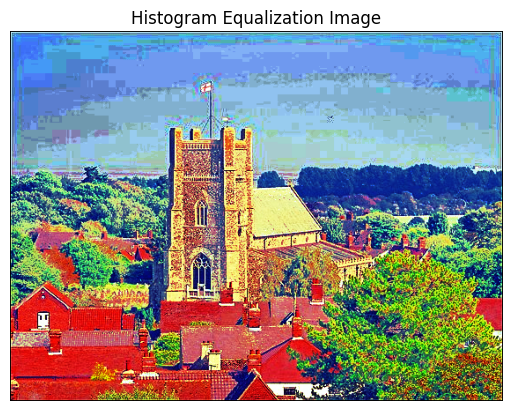

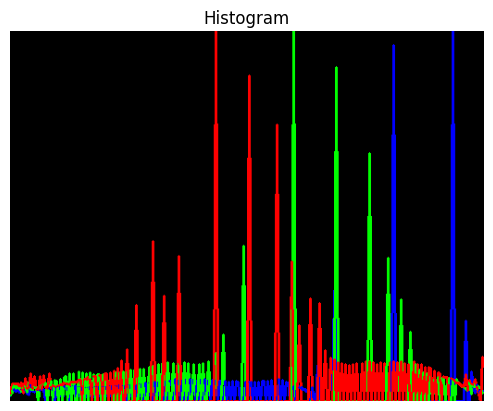

In [12]:
bgr_planes_eq = []

for channel in bgr_planes:
    bgr_planes_eq.append(cv2.equalizeHist(channel))

equ_color = cv2.merge(bgr_planes_eq)

display_image(equ_color, "Histogram Equalization Image")

histogram_color(bgr_planes_eq)

Finally, CLAHE

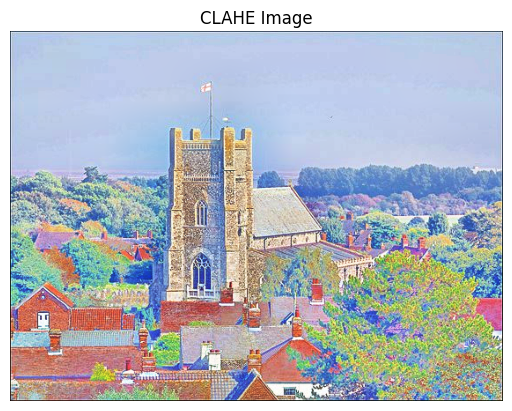

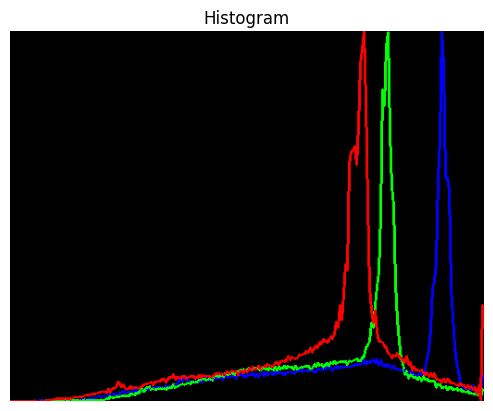

In [13]:
bgr_planes_cl = []

for channel in bgr_planes:
    clahe_channel = clahe.apply(channel)
    bgr_planes_cl.append(clahe_channel)

cl_color = cv2.merge(bgr_planes_cl)

display_image(cl_color, "CLAHE Image")

histogram_color(bgr_planes_cl)